In [1]:
import os


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
filename = 'loantrain.csv'
train = pd.read_csv(filename)
filenam = 'loantest.csv'
test = pd.read_csv(filenam)
filena = 'samplesub.csv'
sample = pd.read_csv(filena)

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
sample.head()

,Loan_ID,Loan_Status


In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [14]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train.shape

(614, 13)

In [17]:
test.shape

(367, 12)

In [18]:
sample.shape

(0, 2)

In [20]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

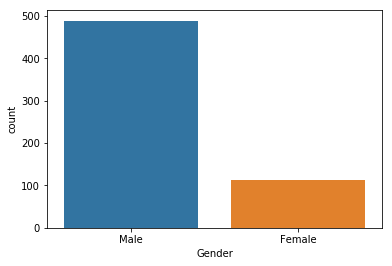

In [23]:
sns.countplot(train.Gender)

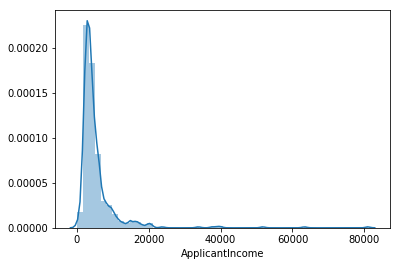

In [27]:
sns.distplot(train.ApplicantIncome)

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

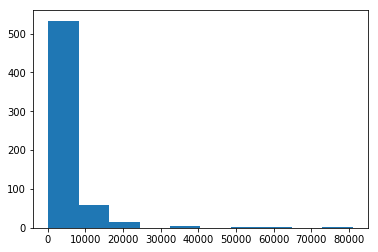

In [29]:
plt.hist(train.ApplicantIncome)

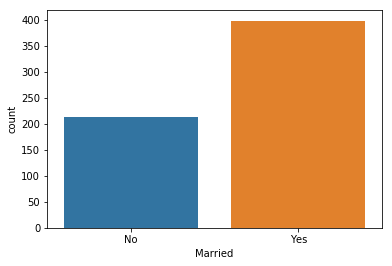

In [37]:
sns.countplot(train.Married)

In [38]:
train.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [40]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

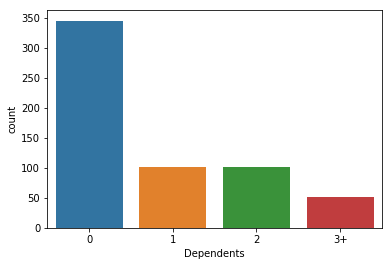

In [42]:
sns.countplot(train.Dependents)

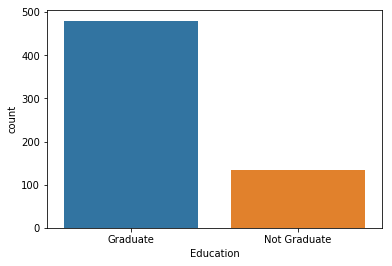

In [43]:
sns.countplot(train.Education)

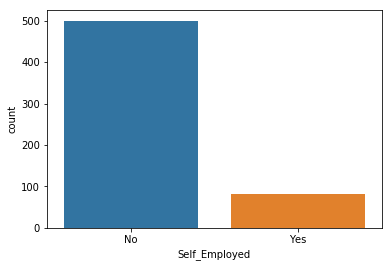

In [44]:
sns.countplot(train.Self_Employed)

In [50]:
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

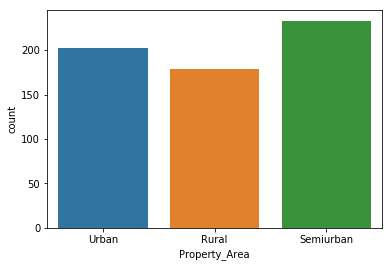

In [51]:
sns.countplot(train.Property_Area)

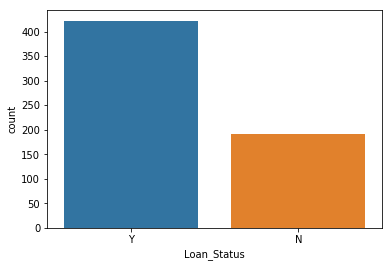

In [52]:
sns.countplot(train.Loan_Status)

In [54]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

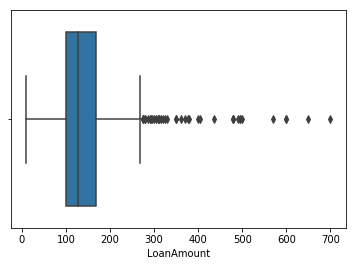

In [55]:
sns.boxplot(train.LoanAmount)

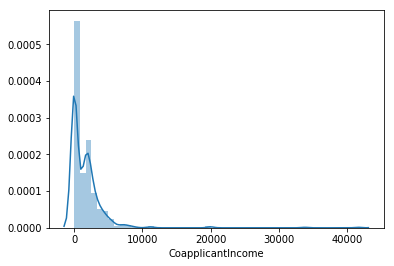

In [57]:
sns.distplot(train.CoapplicantIncome)

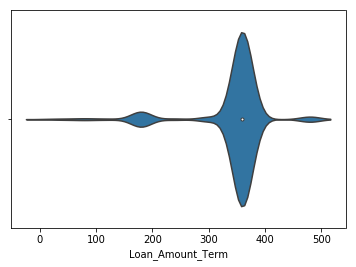

In [59]:
sns.violinplot(train.Loan_Amount_Term)

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

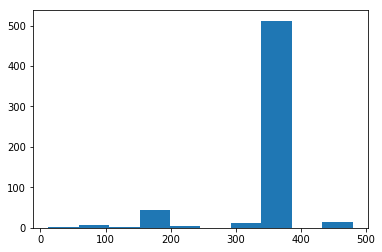

In [60]:
plt.hist(train.Loan_Amount_Term)

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

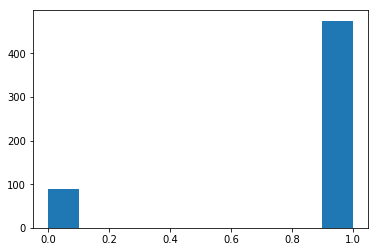

In [61]:
plt.hist(train.Credit_History)

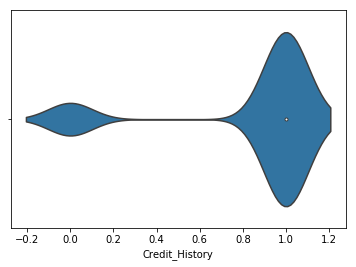

In [64]:
sns.violinplot(train.Credit_History)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


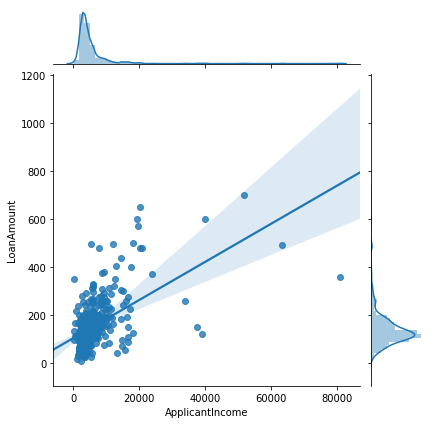

In [71]:
sns.jointplot('ApplicantIncome','LoanAmount',data=train,kind='reg')

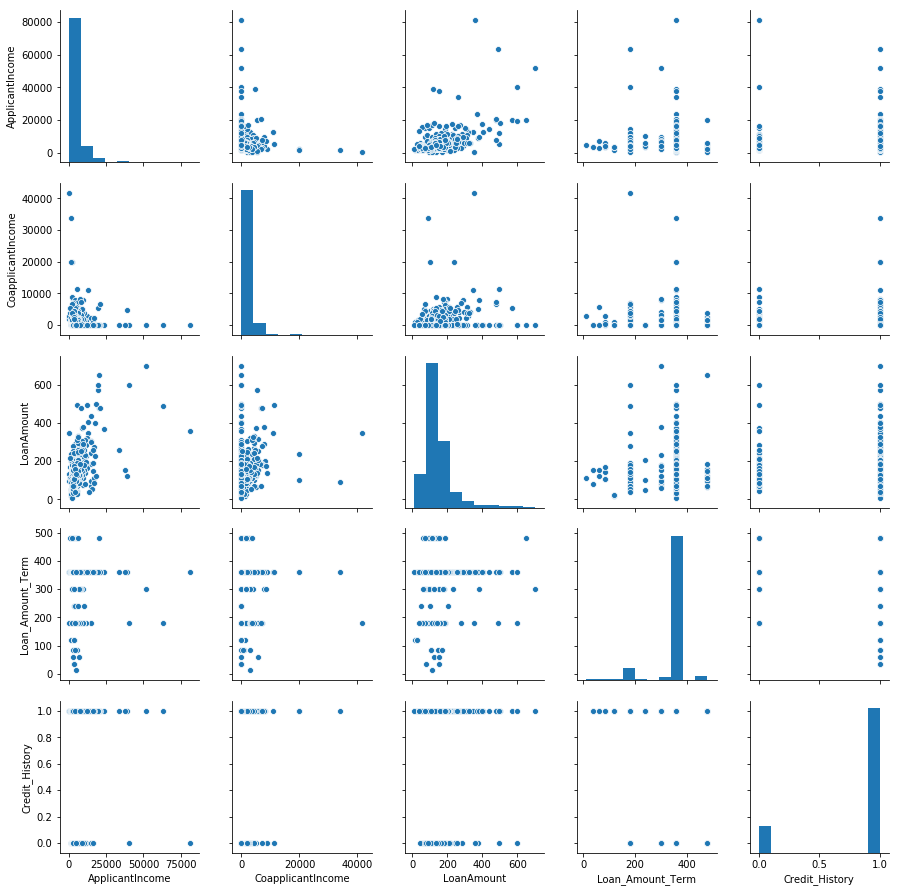

In [72]:
sns.pairplot(data=train)

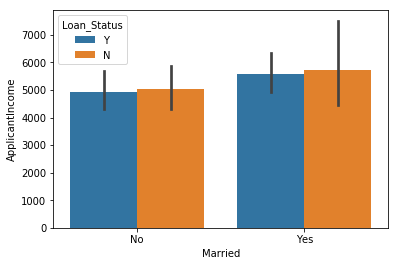

In [77]:
sns.barplot(x='Married',y='ApplicantIncome',hue='Loan_Status', data=train)

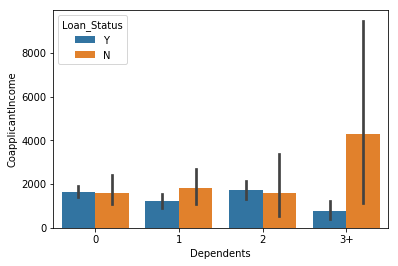

In [86]:
sns.barplot(x='Dependents',y='CoapplicantIncome',hue='Loan_Status',data=train,)

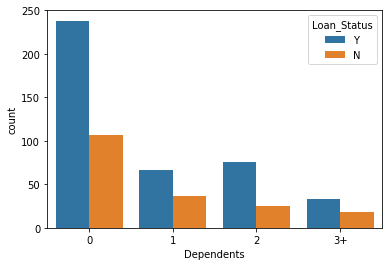

In [87]:
sns.countplot(data=train,x='Dependents', hue='Loan_Status')

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [90]:
train.Gender.describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [91]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
train.Gender.describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [120]:
nw_train = train.copy(deep=True)

In [121]:
nw_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
nw_train.Gender.describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [123]:
nw_train['Gender'].mode()

0    Male
dtype: object

In [124]:
nw_train['Gender'].fillna(nw_train['Gender'].mode()[0], inplace=True)

In [125]:
nw_train['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

In [126]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [127]:
nw_train.Married.mode()

0    Yes
dtype: object

In [128]:
nw_train['Married'].fillna(nw_train['Married'].mode()[0], inplace=True)

In [129]:
nw_train['Dependents'].mode()

0    0
dtype: object

In [130]:
nw_train['Dependents'].fillna(method='ffill')

0       0
1       1
2       0
3       0
4       0
5       2
6       0
7      3+
8       2
9       1
10      2
11      2
12      2
13      0
14      2
15      0
16      1
17      0
18      0
19      0
20      0
21      1
22      0
23      2
24      1
25      0
26      0
27      2
28      0
29      2
       ..
584     1
585     1
586     0
587     0
588     0
589     2
590     0
591     2
592    3+
593     0
594     0
595     0
596     2
597     2
598     0
599     2
600    3+
601     0
602    3+
603     0
604     1
605     0
606     1
607     2
608     0
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [131]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [132]:
nw_train['Dependents'] = nw_train['Dependents'].fillna(method='ffill')

In [133]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [134]:
nw_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
nw_train.Self_Employed.mode()

0    No
dtype: object

In [136]:
nw_train['Self_Employed']=nw_train['Self_Employed'].fillna(method='ffill')

In [137]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [145]:
nw_train['LoanAmount'].median()

129.0

In [147]:
nw_train['LoanAmount'].mode()

0    146.412162
dtype: float64

In [146]:
nw_train['LoanAmount'].mean()

146.41216216216213

In [142]:
nw_train['LoanAmount'].fillna(nw_train['LoanAmount'].mean(),inplace=True)

In [150]:
nw_train.LoanAmount.value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
187.000000    12
113.000000    11
128.000000    11
130.000000    10
96.000000      9
95.000000      9
70.000000      8
115.000000     8
112.000000     8
135.000000     7
150.000000     7
136.000000     7
132.000000     7
125.000000     7
104.000000     7
80.000000      6
81.000000      6
138.000000     6
90.000000      6
158.000000     6
116.000000     6
175.000000     6
144.000000     6
155.000000     6
180.000000     6
              ..
315.000000     1
101.000000     1
73.000000      1
142.000000     1
48.000000      1
164.000000     1
83.000000      1
191.000000     1
166.000000     1
495.000000     1
59.000000      1
214.000000     1
240.000000     1
72.000000      1
42.000000      1
349.000000     1
280.000000     1
405.000000     1
279.000000     1
304.000000     1
650.000000     1
436.000000     1
78.000000      1
54.000000      1
89.000000      1
570.000000     1
300.000000     1
376.000000    

In [151]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [156]:
nw_train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [157]:
nw_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [160]:
nw_train.Loan_Amount_Term.mean()

342.0

In [163]:
nw_train['Loan_Amount_Term'].fillna(nw_train['Loan_Amount_Term'].median(),inplace=True)

In [164]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [170]:
nw_train['Credit_History'].fillna(method='ffill',inplace=True)

In [171]:
nw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [172]:
nw_train = nw_train.drop('Loan_ID', axis=1)

In [173]:
nw_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [174]:
X = nw_train.drop('Loan_Status',1)

In [175]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [176]:
y= train.Loan_Status

In [177]:
X= pd.get_dummies(X)

In [178]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [179]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [180]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFR', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.794906 (0.046119)
RFR: 0.746013 (0.058891)
LDA: 0.804264 (0.051980)
KNN: 0.622425 (0.101598)
CART: 0.692580 (0.066453)
ETC: 0.722702 (0.081907)
NB: 0.780952 (0.060599)
SVM: 0.692303 (0.079738)


In [181]:
model = []
model.append(('LR', LogisticRegression()))
model.append(('RFR', RandomForestClassifier()))
model.append(('LDA', LinearDiscriminantAnalysis()))
model.append(('KNN', KNeighborsClassifier()))
model.append(('CART', DecisionTreeClassifier()))
model.append(('ETC', ExtraTreesClassifier()))
model.append(('NB', GaussianNB()))
model.append(('SVM', SVC()))
# evaluate each model in turn
result = []
name = []
for nam, modl in model:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(modl, X, y, cv=kfold, scoring='accuracy')
    result.append(cv_results)
    name.append(nam)
    msg = "%s: %f (%f)" % (nam, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.804733 (0.036855)
RFR: 0.737652 (0.047150)
LDA: 0.806372 (0.037117)
KNN: 0.618905 (0.041739)
CART: 0.710127 (0.045489)
ETC: 0.734506 (0.033427)
NB: 0.788445 (0.036041)
SVM: 0.690613 (0.032651)


In [183]:
loan_model = LinearDiscriminantAnalysis()

In [184]:
loan_model.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [185]:
loan_pred = loan_model.predict(x_cv)

In [187]:
loan_model_full = LinearDiscriminantAnalysis()
loan_model_full.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [188]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [189]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [192]:
testx = test.copy(deep=True)

In [193]:
testx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [195]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed']=test['Self_Employed'].fillna(method='ffill')
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)
test['Credit_History'].fillna(method='ffill',inplace=True)

In [196]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [197]:
test = test.drop('Loan_ID', axis=1)

In [198]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.6+ KB


In [199]:
test = pd.get_dummies(test)

In [200]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [201]:
loan_model_full_pred = loan_model_full.predict(test)

In [248]:
sample.head()

,Loan_ID,Loan_Status


In [203]:
output = pd.DataFrame({'Loan_ID': testx.Loan_ID,
                      'Loan_Status': loan_model_full_pred})


In [206]:
output.Loan_Status.value_counts()

Y    306
N     61
Name: Loan_Status, dtype: int64

In [210]:
output.to_csv('LDA.csv', index=False)

In [211]:
filename='LDA.csv'
samm = pd.read_csv(filename)

In [212]:
samm.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [213]:
####Cleaning up the data and filling up missing data with averages
TRAin = train.copy(deep=True)

In [217]:
TesT = testx.copy(deep=True)

In [218]:
TRAin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [220]:
TesT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [221]:
TRAin['Total_Income'] = TRAin['ApplicantIncome'] + TRAin['CoapplicantIncome']

In [222]:
TRAin.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [223]:
TRAin['Gender'].fillna(TRAin['Gender'].mode()[0], inplace=True)
TRAin['Married'].fillna(TRAin['Married'].mode()[0], inplace=True)
TRAin['Dependents'].fillna(TRAin['Dependents'].mode()[0], inplace=True)
TRAin['Self_Employed'].fillna(TRAin['Self_Employed'].mode()[0], inplace=True)
TRAin['LoanAmount'].fillna(TRAin['LoanAmount'].median(),inplace=True)
TRAin['Loan_Amount_Term'].fillna(TRAin['Loan_Amount_Term'].median(),inplace=True)
TRAin['Credit_History'].fillna(TRAin['Credit_History'].median(), inplace=True)

In [224]:
TRAin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Total_Income         614 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.2+ KB


In [229]:
TRAin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Total_Income         614 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.2+ KB


In [230]:
TRAin = TRAin.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)

In [231]:
TRAin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Education           614 non-null object
Self_Employed       614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
Total_Income        614 non-null float64
dtypes: float64(4), object(7)
memory usage: 52.8+ KB


In [232]:
TRAinX = TRAin.drop('Loan_Status',axis=1)

In [233]:
TRAinY = TRAin.Loan_Status

In [235]:
TRAinX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
Gender              614 non-null object
Married             614 non-null object
Dependents          614 non-null object
Education           614 non-null object
Self_Employed       614 non-null object
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Credit_History      614 non-null float64
Property_Area       614 non-null object
Total_Income        614 non-null float64
dtypes: float64(4), object(6)
memory usage: 48.0+ KB


In [237]:
TRAinX =pd.get_dummies(TRAinX)

In [240]:
TRAinX.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,128.0,360.0,1.0,5849.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,128.0,360.0,1.0,6091.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,66.0,360.0,1.0,3000.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,120.0,360.0,1.0,4941.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,141.0,360.0,1.0,6000.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [238]:
x_trainx, x_cvx, y_trainx, y_cvx = train_test_split(TRAinX,TRAinY, test_size =0.3)

In [239]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFR', RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, x_trainx, y_trainx, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.804350 (0.041377)
RFR: 0.759973 (0.027583)
LDA: 0.809001 (0.036703)
KNN: 0.613297 (0.086026)
CART: 0.715677 (0.029422)
ETC: 0.734419 (0.055159)
NB: 0.785691 (0.042745)
SVM: 0.685527 (0.054655)


In [241]:
LOGG = LogisticRegression()
LOGG.fit(x_trainx,y_trainx)
LOGGpred = LOGG.predict(x_cvx)
LOGG_full = LogisticRegression()
LOGG_full.fit(x_trainx, y_trainx)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [242]:
TesT['Gender'].fillna(TesT['Gender'].mode()[0], inplace=True)
TesT['Dependents'].fillna(TesT['Dependents'].mode()[0], inplace=True)
TesT['Self_Employed'].fillna(TesT['Self_Employed'].mode()[0], inplace=True)
TesT['LoanAmount'].fillna(TesT['LoanAmount'].median(),inplace=True)
TesT['Loan_Amount_Term'].fillna(TesT['Loan_Amount_Term'].median(),inplace=True)
TesT['Credit_History'].fillna(TesT['Credit_History'].median(), inplace=True)

In [243]:
TesT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [244]:
TesT = TesT.drop('Loan_ID', axis=1)

In [245]:
TesT['Total_Income'] = TesT['ApplicantIncome'] + TesT['CoapplicantIncome']
TesT = TesT.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [246]:
TesT = pd.get_dummies(TesT)

In [247]:
TesT.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,110.0,360.0,1.0,5720,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,126.0,360.0,1.0,4576,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,208.0,360.0,1.0,6800,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,100.0,360.0,1.0,4886,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,78.0,360.0,1.0,3276,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


In [249]:
LOGG_full_pred = LOGG_full.predict(TesT)

In [250]:

accuracy_score(y_cvx, LOGG.predict(x_cvx))

0.8054054054054054

In [251]:
accuracy_score(y_cvx, LOGG_full.predict(x_cvx))

0.8054054054054054

In [252]:
output = pd.DataFrame({'Loan_ID': testx.Loan_ID,
                      'Loan_Status': LOGG_full_pred})
output.to_csv('LR.csv', index=False)